# Stock market Analysis

In this project, we'll analyse data from the stock market for some technology stocks.

Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions we'll try to answer:

* What was the change in a stock's price over time?
* What was the daily return average of a stock?
* What was the moving average of various stocks?
* What was the correlation between daily returns of different stocks?
* How much value do we put at risk by investing in a particular stock?
* How can we attempt to predict future stock behaviour?

Importing required libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn")
sns.set_style('whitegrid')
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division
from matplotlib.pyplot import figure

In [2]:
symbols = ['SBIN.NS','TATASTEEL.NS','MARUTI.NS','MRF.NS']
names = ['SBI','TATASTEEL','MARUTI','MRF']

In [3]:
#end date to today
end = datetime.now()

#start time set to 1 year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
end, start

(datetime.datetime(2022, 1, 10, 12, 2, 21, 545231),
 datetime.datetime(2021, 1, 10, 0, 0))

In [5]:
for i,symbol in enumerate(symbols):
    globals()[names[i]] =  DataReader(symbol,'yahoo',start,end)
    print(i,symbol)

0 SBIN.NS
1 TATASTEEL.NS
2 MARUTI.NS
3 MRF.NS


In [6]:
SBI.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-11,288.200012,279.600006,288.000000,282.500000,29703173.0,279.915680
2021-01-12,293.850006,277.899994,280.000000,292.500000,44307145.0,289.824188
2021-01-13,308.000000,294.500000,296.000000,306.799988,78042133.0,303.993378
2021-01-14,309.250000,303.799988,306.700012,307.250000,40123498.0,304.439270
2021-01-15,310.899994,301.299988,306.799988,303.850006,35307601.0,301.070374


In [7]:
MRF.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-11,83000.000000,80500.000000,80700.0,82507.898438,48475.0,82451.062500
2021-01-12,87000.000000,81712.398438,82400.0,85746.898438,87936.0,85687.828125
2021-01-13,87399.953125,85300.000000,86200.0,85642.296875,57619.0,85583.304688
2021-01-14,89938.101562,85785.000000,86300.0,88749.648438,55671.0,88688.507812
2021-01-15,89823.898438,86401.296875,89150.0,87551.750000,57495.0,87491.437500


In [8]:
TATASTEEL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-11,712.000000,688.200012,712.000000,695.650024,17024509.0,680.423279
2021-01-12,724.500000,691.099976,695.000000,694.900024,24525484.0,679.689697
2021-01-13,714.549988,693.000000,701.450012,709.150024,19353871.0,693.627747
2021-01-14,714.450012,697.099976,710.000000,706.349976,11540858.0,690.888977
2021-01-15,721.500000,697.650024,712.000000,705.900024,20688437.0,690.448914


In [9]:
SBI.describe()

,High,Low,Open,Close,Volume,Adj Close
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000
mean,425.596169,413.708668,419.862903,419.655847,3.472401e+07,418.369372
std,57.319744,57.110756,57.554552,57.048634,2.710901e+07,58.240823
min,283.350006,269.500000,271.899994,275.649994,5.812425e+06,273.128326
25%,392.887497,379.562492,388.087509,384.274994,1.724893e+07,380.759628
50%,431.750000,421.900009,427.000000,426.600006,2.778954e+07,426.600006
75%,464.000000,451.449997,460.250000,457.924995,4.276659e+07,457.924995
max,542.299988,528.049988,534.450012,530.450012,2.149557e+08,530.450012


In [10]:
SBI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2021-01-11 to 2022-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       248 non-null    float64
 1   Low        248 non-null    float64
 2   Open       248 non-null    float64
 3   Close      248 non-null    float64
 4   Volume     248 non-null    float64
 5   Adj Close  248 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


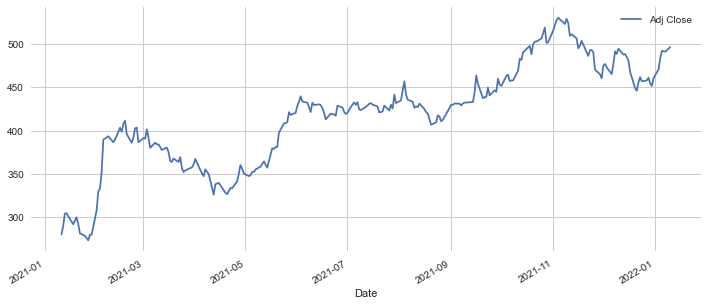

In [11]:
SBI['Adj Close'].plot(legend=True, figsize=(12,5));

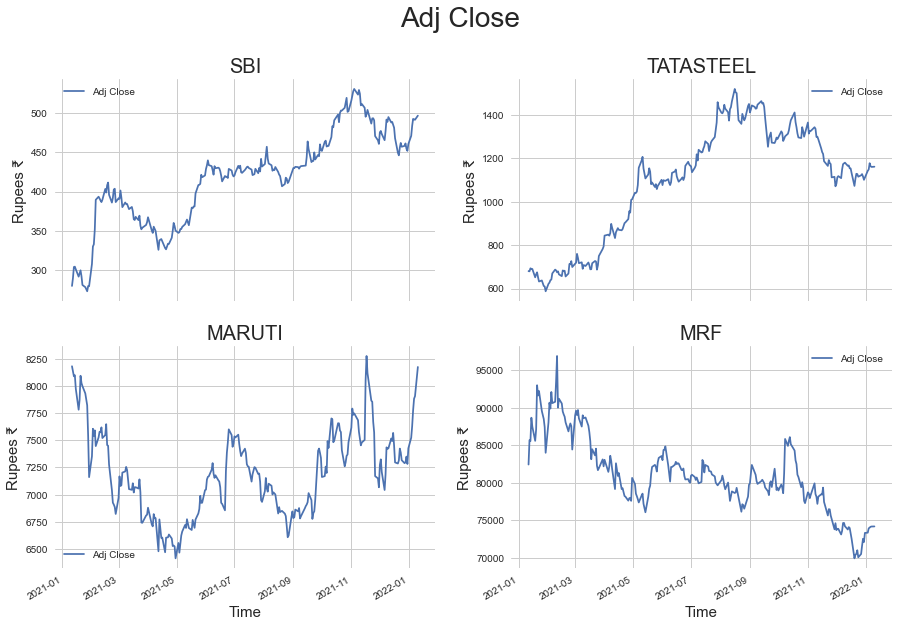

In [12]:
df_list = [SBI,TATASTEEL,MARUTI,MRF]
ncols = 2
nrows = 2 
fig, axes = plt.subplots(nrows, ncols, figsize=(35,22),sharex=True)
fig.suptitle("Adj Close",fontsize=28)
count=0
for r in range(0,nrows):
    for c in range(0,ncols):
        df_list[count]['Adj Close'].plot(ax=axes[r,c],legend=True, figsize=(15,10))
        axes[r,c].set_title(names[count], fontsize=20)
        axes[r,c].set_ylabel("Rupees ₹",fontsize=15)
        axes[r,c].set_xlabel("Time",fontsize=15)
        count+=1

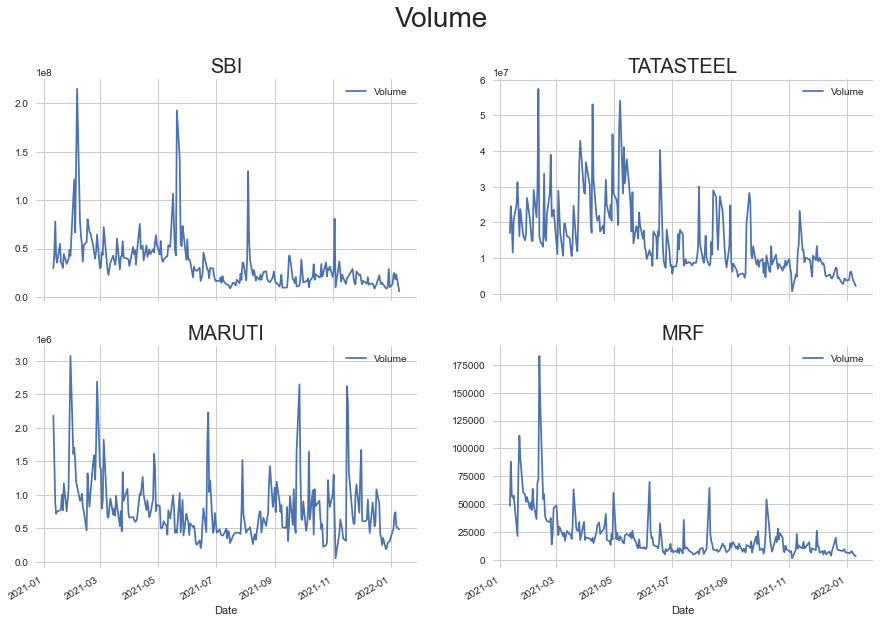

In [13]:
fig, axes = plt.subplots(nrows, ncols, figsize=(35,22),sharex=True)
fig.suptitle("Volume",fontsize=28)
count=0
for r in range(nrows):
    for c in range(ncols):
        df_list[count]['Volume'].plot(ax=axes[r,c],legend=True, figsize=(15,10))
        axes[r,c].set_title(names[count], fontsize=20)
        count+=1

# What was the moving average of various stocks?
Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [14]:
days = [10,20,50]

for day in days:
    column_name = 'MA for %s days' %(str(day))
    for i in df_list:
        i[column_name] = i['Adj Close'].rolling(window=day,center=False).mean()

In [15]:
SBI.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-01-04,484.700012,471.049988,472.500000,483.500000,23296671.0,483.500000,461.470001,469.744998,487.204000
2022-01-05,495.000000,479.149994,481.899994,492.399994,24694169.0,492.399994,465.125000,469.787498,486.922000
2022-01-06,494.399994,485.399994,487.700012,491.700012,18190843.0,491.700012,468.115002,469.939999,486.505001
2022-01-07,501.950012,489.450012,493.450012,491.250000,22746330.0,491.250000,471.545001,469.767499,485.947000
2022-01-10,498.750000,492.500000,493.350006,496.500000,5812425.0,496.500000,475.390002,470.202499,485.850000


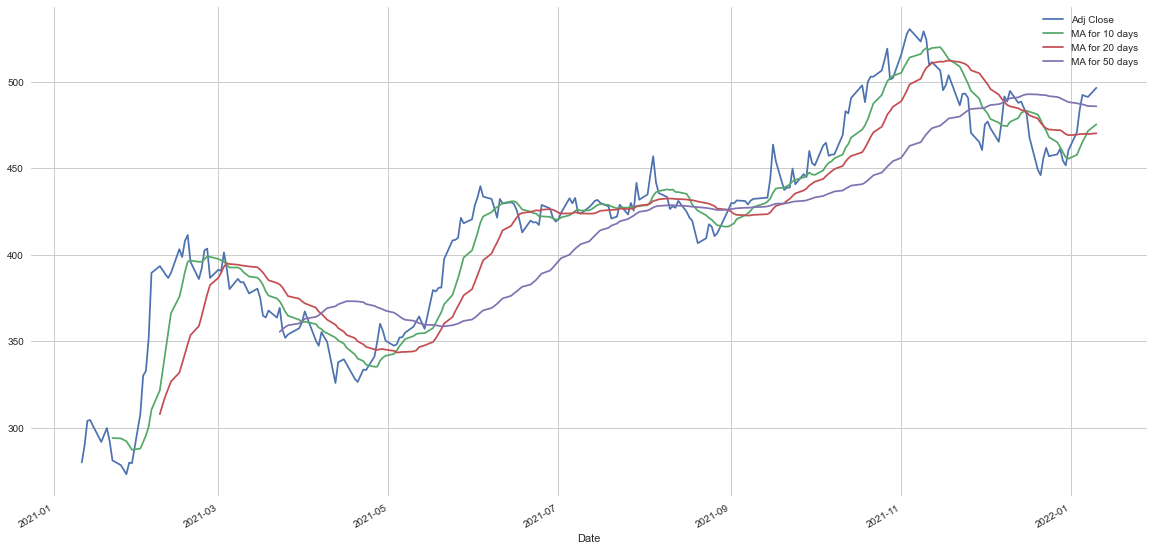

In [16]:
SBI[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(20,10));

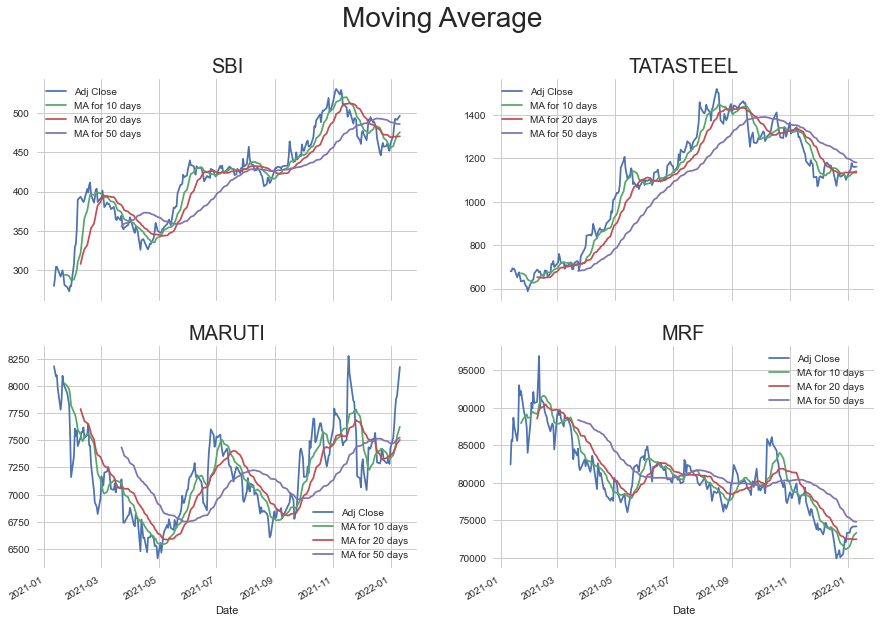

In [17]:
fig, axes = plt.subplots(nrows, ncols, figsize=(35,22),sharex=True)
fig.suptitle("Moving Average",fontsize=28)
count=0
for r in range(nrows):
    for c in range(ncols):
        df_list[count][['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[r,c],legend=True, figsize=(15,10),subplots=False)
        axes[r,c].set_title(names[count], fontsize=20)
        count+=1

# What was the daily return average of a stock?

In [18]:
for i in df_list:
    i['Daily Return'] = i['Adj Close'].pct_change()

In [19]:
SBI['Daily Return'].head()

Date
2021-01-11         NaN
2021-01-12    0.035398
2021-01-13    0.048889
2021-01-14    0.001467
2021-01-15   -0.011066
Name: Daily Return, dtype: float64

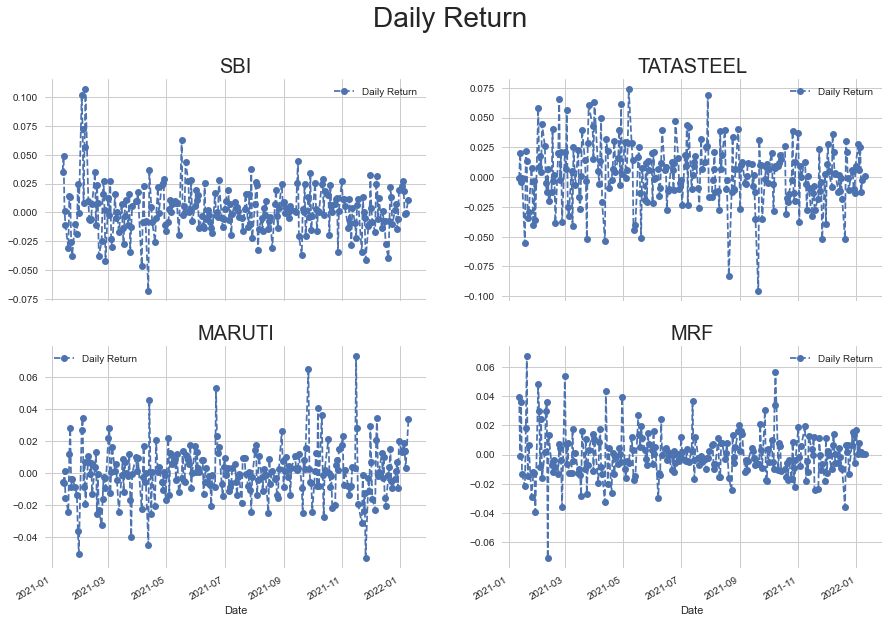

In [20]:
# Plotting daily return
fig, axes = plt.subplots(nrows, ncols, figsize=(50,50),sharex=True)
fig.suptitle("Daily Return",fontsize=28)
count=0
for r in range(nrows):
    for c in range(ncols):
        df_list[count][['Daily Return']].plot(ax=axes[r,c],legend=True, figsize=(15,10),subplots=False,linestyle='--',marker='o')
        axes[r,c].set_title(names[count], fontsize=20)
        count+=1

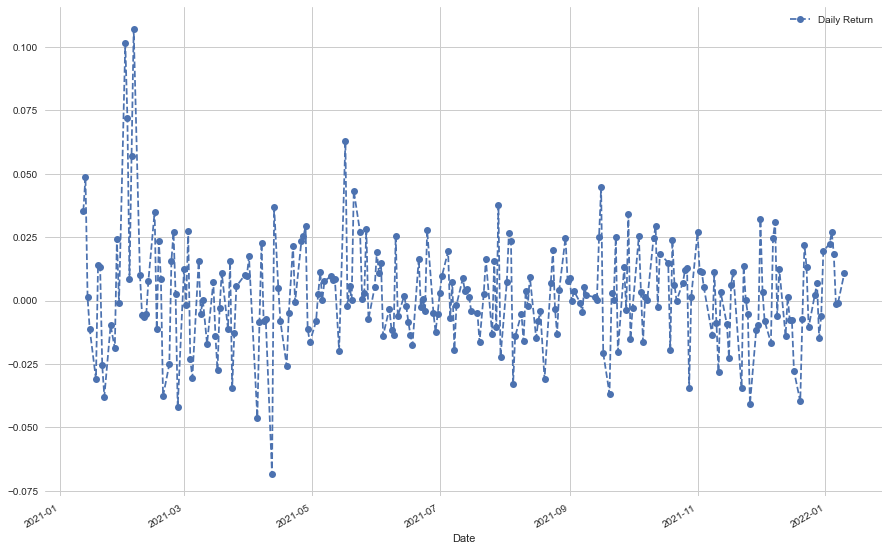

In [21]:
SBI['Daily Return'].plot(legend=True, figsize=(15,10),subplots=False,linestyle='--',marker='o');

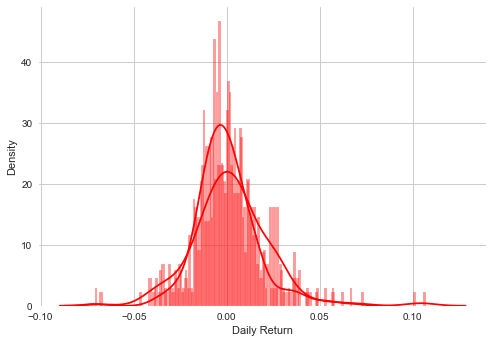

In [22]:
sns.distplot(SBI['Daily Return'].dropna(),bins=100,color='red');
sns.distplot(MRF['Daily Return'].dropna(),bins=100,color='red');

# What was the correlation between daily returns of different stocks?

In [23]:
# Reading just 'Adj Close' column
close_df = DataReader(symbols,'yahoo',start,end)['Adj Close']
close_df

Symbols,SBIN.NS,TATASTEEL.NS,MARUTI.NS,MRF.NS
Date,,,,
2021-01-11,279.915680,680.423279,8180.591797,82451.054688
2021-01-12,289.824188,679.689697,8136.174805,85687.828125
2021-01-13,303.993378,693.627747,8088.280762,85583.304688
2021-01-14,304.439270,690.888977,8097.819824,88688.515625
2021-01-15,301.070374,690.448914,7973.909668,87491.437500
...,...,...,...,...
2022-01-04,483.500000,1148.800049,7630.100098,73937.203125
2022-01-05,492.399994,1177.599976,7775.350098,74046.000000
2022-01-06,491.700012,1163.250000,7882.100098,74155.296875


In [24]:
#Getting daily return of pur stocks
ret_df = close_df.pct_change()
ret_df

Symbols,SBIN.NS,TATASTEEL.NS,MARUTI.NS,MRF.NS
Date,,,,
2021-01-11,NaN,NaN,NaN,NaN
2021-01-12,0.035398,-0.001078,-0.005430,0.039257
2021-01-13,0.048889,0.020506,-0.005887,-0.001220
2021-01-14,0.001467,-0.003948,0.001179,0.036283
2021-01-15,-0.011066,-0.000637,-0.015302,-0.013498
...,...,...,...,...
2022-01-04,0.026975,0.005558,0.014115,0.007762
2022-01-05,0.018407,0.025070,0.019036,0.001471
2022-01-06,-0.001422,-0.012186,0.013729,0.001476


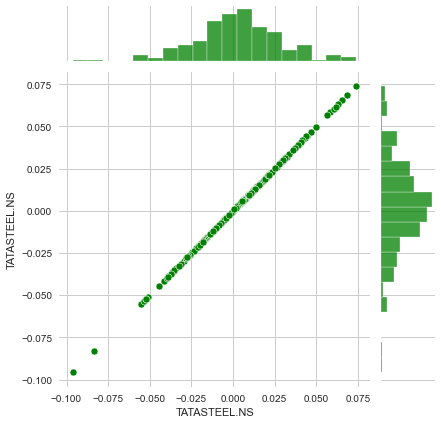

In [25]:
sns.jointplot('TATASTEEL.NS','TATASTEEL.NS',ret_df,kind='scatter',color='green');

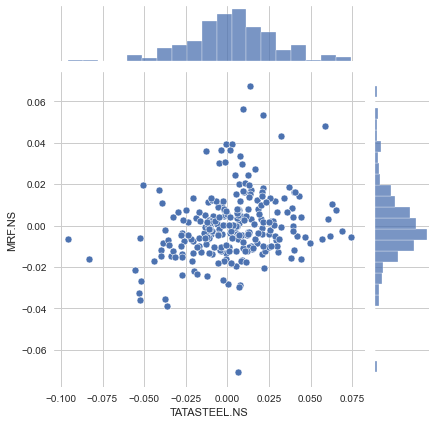

In [26]:
sns.jointplot('TATASTEEL.NS','MRF.NS',ret_df,kind='scatter');

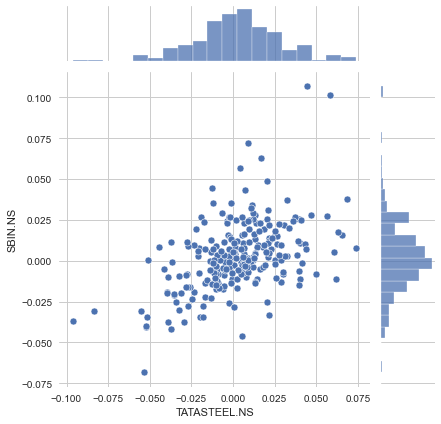

In [27]:
sns.jointplot('TATASTEEL.NS','SBIN.NS',ret_df,kind='scatter');

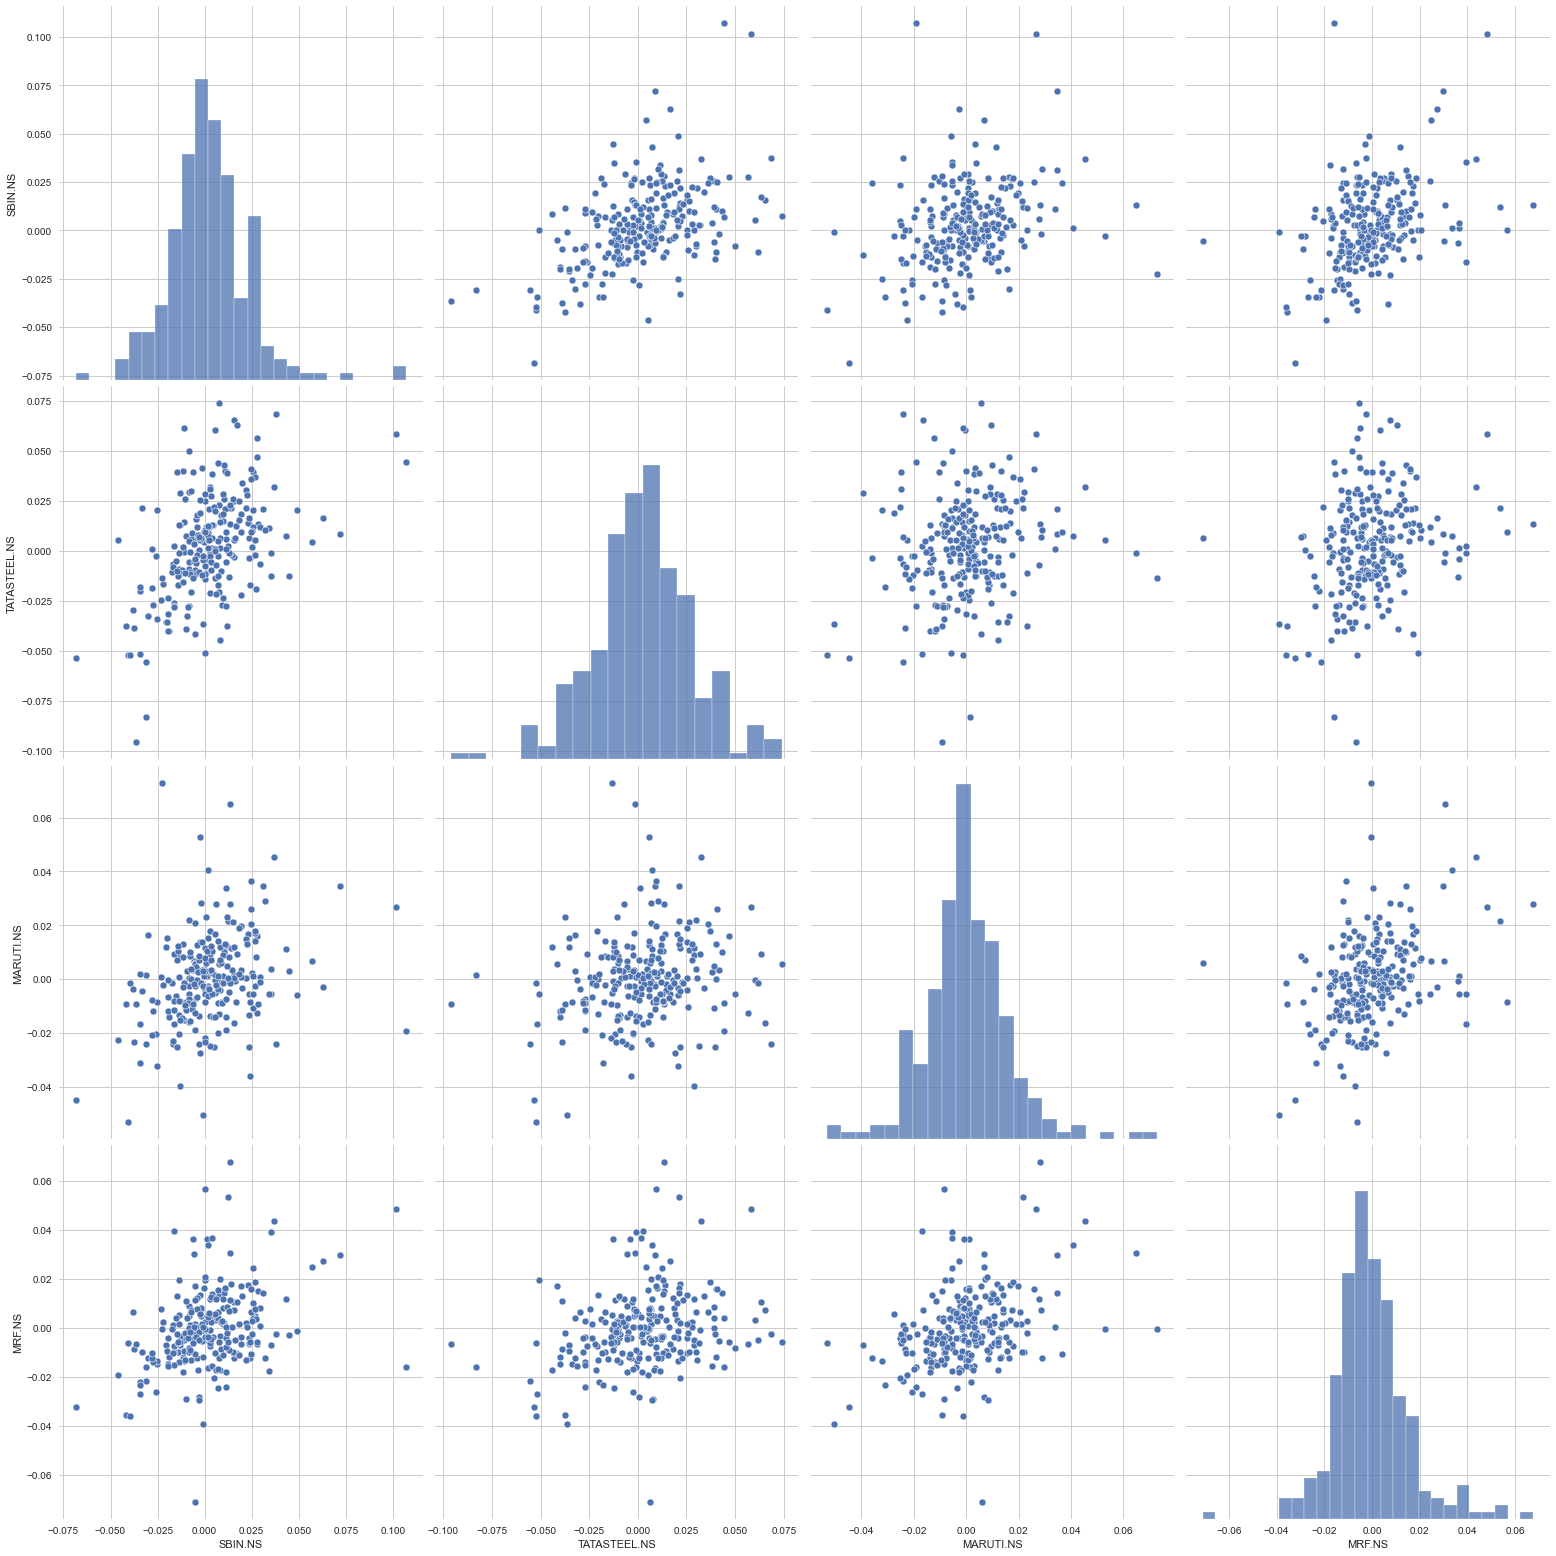

In [28]:
sns.pairplot(ret_df.dropna(),height=5.5);

To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

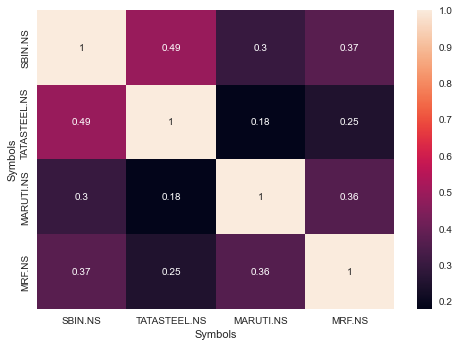

In [29]:
corr=ret_df.dropna().corr()
sns.heatmap(corr,annot=True);

# How much value do we put at risk by investing in a particular stock?
A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [30]:
rets = ret_df.dropna()

In [31]:
mean = rets.mean()
std = rets.std()

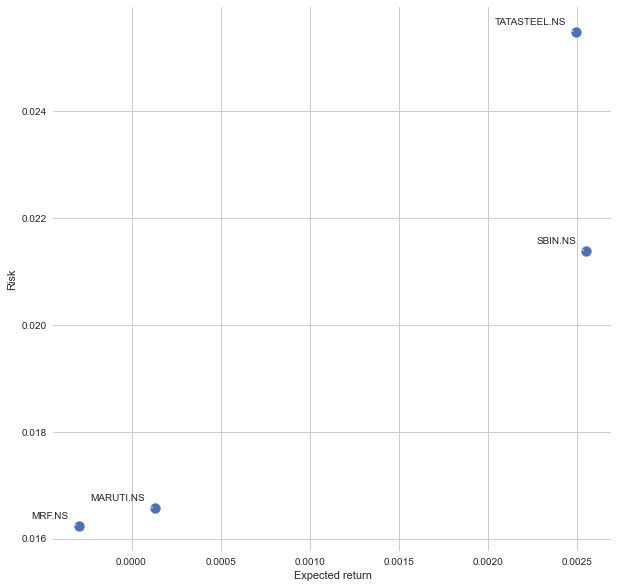

In [32]:
plt.figure(figsize=(10,10))

plt.scatter(mean,std,s=100)
plt.xlabel("Expected return")
plt.ylabel("Risk")

# for annotation in the scatterplot

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(-10,5),
                 textcoords = "offset points", ha = 'right', va = 'bottom',
                 arrowprops = dict(arrowstyle = '->'))

# Value at Risk
We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

### Bootstrap Method

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

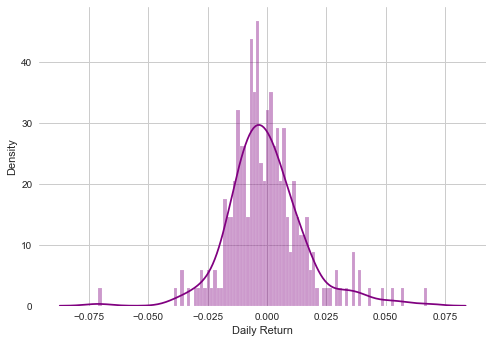

In [34]:
sns.distplot(MRF['Daily Return'].dropna(),bins=100,color='purple');

In [35]:
rets.head()

Symbols,SBIN.NS,TATASTEEL.NS,MARUTI.NS,MRF.NS
Date,,,,
2021-01-12,0.035398,-0.001078,-0.005430,0.039257
2021-01-13,0.048889,0.020506,-0.005887,-0.001220
2021-01-14,0.001467,-0.003948,0.001179,0.036283
2021-01-15,-0.011066,-0.000637,-0.015302,-0.013498
2021-01-18,-0.030936,-0.055532,-0.024188,-0.021586


In [45]:
#Using pandas built in quantile method
round(rets['MRF.NS'].quantile(0.05),3)

-0.023

In [39]:
rets.columns[0]

'SBIN.NS'

In [42]:
for i in symbols:
    print("{} :  {}".format(i.rstrip('.NS'),rets[i].quantile(0.05)))

SBI :  -0.03096303528193829
TATASTEEL :  -0.0389771972723306
MARUTI :  -0.024188133706537385
MRF :  -0.022995223190126868


In [52]:
for i in symbols:
    print("The 0.05 empirical quantile of daily return for {} is at {}. This means that with the 95% condifence, the worst daily loss will not exceed {}% of the investment\n".format(i.rstrip('.NS'),round(rets[i].quantile(0.05),6),round(rets[i].quantile(0.05),3)*100))

The 0.05 empirical quantile of daily return for SBI is at -0.030963. This means that with the 95% condifence, the worst daily loss will not exceed -3.1% of the investment

The 0.05 empirical quantile of daily return for TATASTEEL is at -0.038977. This means that with the 95% condifence, the worst daily loss will not exceed -3.9% of the investment

The 0.05 empirical quantile of daily return for MARUTI is at -0.024188. This means that with the 95% condifence, the worst daily loss will not exceed -2.4% of the investment

The 0.05 empirical quantile of daily return for MRF is at -0.022995. This means that with the 95% condifence, the worst daily loss will not exceed -2.3% of the investment



# How can we attempt to predict future stock behaviour?
### Monte Carlo Method

In [59]:
days = 365

dt = 1/365

mu = rets.mean()['MRF.NS']
sigma = rets.std()['MRF.NS']

In [64]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [65]:
MRF.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-01-11,83000.000000,80500.000000,80700.0,82507.898438,48475.0,82451.062500,NaN,NaN,NaN,NaN
2021-01-12,87000.000000,81712.398438,82400.0,85746.898438,87936.0,85687.828125,NaN,NaN,NaN,0.039257
2021-01-13,87399.953125,85300.000000,86200.0,85642.296875,57619.0,85583.304688,NaN,NaN,NaN,-0.001220
2021-01-14,89938.101562,85785.000000,86300.0,88749.648438,55671.0,88688.507812,NaN,NaN,NaN,0.036283
2021-01-15,89823.898438,86401.296875,89150.0,87551.750000,57495.0,87491.437500,NaN,NaN,NaN,-0.013497


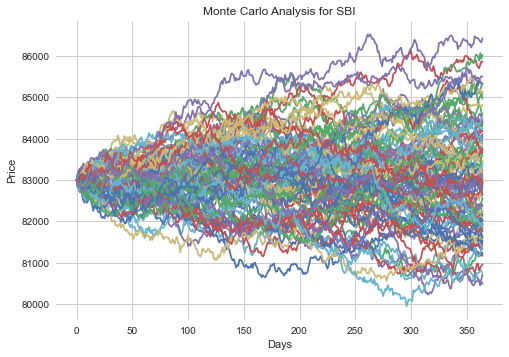

In [66]:
start_price = 83000.000

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for SBI");

In [67]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

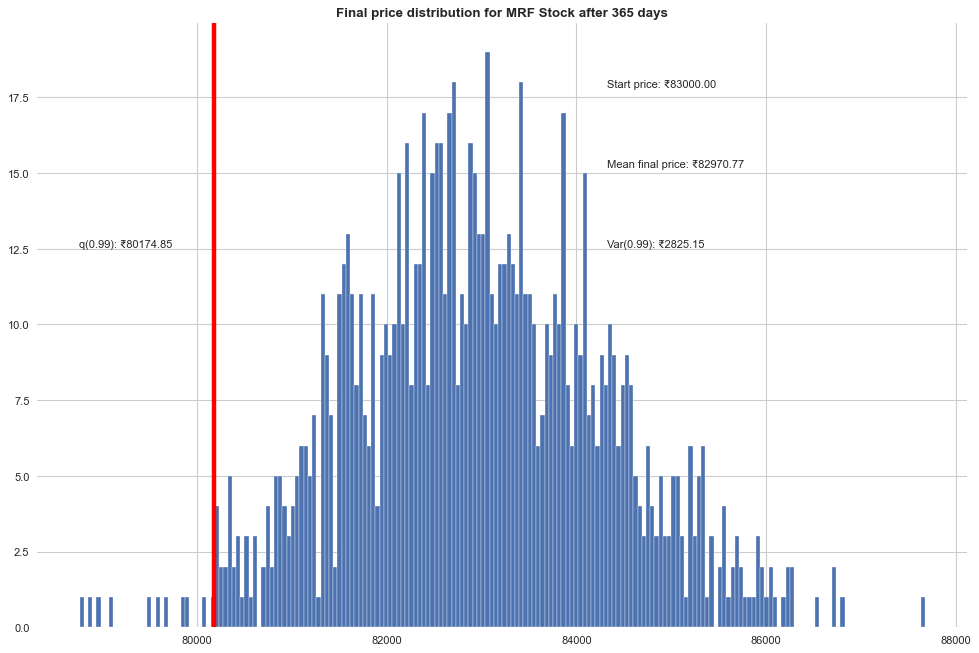

In [81]:
q = np.percentile(simulations,1)

figure(figsize=(15,10), dpi=80)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: ₹%.2f" % start_price)
plt.figtext(0.6,0.7,s="Mean final price: ₹%.2f" % simulations.mean())
plt.figtext(0.6,0.6,s="Var(0.99): ₹%.2f" % (start_price- q))
plt.figtext(0.16,0.6,s="q(0.99): ₹%.2f" % q)

plt.axvline(x=q, linewidth=4, color = 'r')

plt.title("Final price distribution for MRF Stock after {} days".format(days), weight = 'bold');

__MRF stock is pretty stable.__
* Opening price was - ₹83000.
* The average final price - ₹82970.77.

* The red line indicated the value of a stock at risk.
* For every stock, we'd be risking ₹2825.15, 99% of the time.